In [1]:
import nelpy as nel
import pandas as pd
import numpy as np
# sys.path.append(r'C:/Users/schafferlab/Documents/GitHub/neurocode/loadData')
sys.path.append(r'C:\Users\schafferlab\Documents\ripple_heterogeneity\python') 
import loading
import matplotlib.pyplot as plt

In [2]:
import matplotlib
import math

def log_x_axis(ax,x,round_n=2,n_steps=5):
    """
    function to space X axis in log scale without logging x values
    """
    x_log = np.linspace(math.floor(min(x)),math.ceil(max(x)),n_steps)
    ax.set_xticks(x_log)
    ax.set_xticklabels(np.round(10**x_log,round_n))
    
def log_y_axis(ax,y,round_n=2,n_steps=5):
    """
    function to space Y axis in log scale without logging y values
    """
    y_log = np.linspace(math.floor(min(y)),math.ceil(max(y)),n_steps)
    ax.set_yticks(y_log)
    ax.set_yticklabels(np.round(10**y_log,round_n))

def plot_sig_replay_over_epochs(basepath,ax):

    states_dict = loading.load_SleepState_states(basepath)
    epoch_df = loading.load_epoch(basepath)
    ripples = loading.load_ripples_events(basepath)

    cmap = matplotlib.cm.get_cmap('tab20')

    var_keys = ['WAKEstate','NREMstate','REMstate']

    y = np.arange(len(var_keys + list(epoch_df.environment))+2)*.1

    for i,key in enumerate(var_keys):
        for pair in states_dict[key]:
            plt.axvspan(pair[0], pair[1],y[i],y[i+1], alpha=0.5,color=cmap(i*.1))

    for ep in epoch_df.itertuples():
        i+=1
        plt.axvspan(ep.startTime, ep.stopTime,y[i],y[i+1], alpha=0.5,color=cmap(i*.1))
    
    i+=1

    for ep in ripples.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=0.15,color='k')
 
    ax = plt.gca()
    ax.set_yticks(y[:-1]+.05)
    ax.set_yticklabels(var_keys + list(epoch_df.environment) + ["ripples"])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlabel('Recording time (s)')
# plot_sig_replay_over_epochs(basepath,)

In [4]:
basepath = 'D:/app_ps1/data/hpc04/hpc04_day06_220217_085558/'

# load spike times 
st,cell_metrics = loading.load_spikes(basepath)
ripples = loading.load_ripples_events(basepath)

# behavioral epochs
epoch_df = loading.load_epoch(basepath)
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])
# get brain states                                                
state_dict = loading.load_SleepState_states(basepath)
nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
wake_epochs = nel.EpochArray(state_dict['WAKEstate'])
rem_epochs = nel.EpochArray(state_dict['REMstate'])

ripple_epochs = nel.EpochArray([np.array([ripples.start, ripples.stop]).T])




In [10]:
epoch_df

,name,startTime,stopTime,environment,behavioralParadigm
0,pre_task_sleep,0.0000,2252.9000,sleep,NaN
1,post_injection_habituation,3112.0945,5140.9954,sleep,encoding
2,baseline,5263.4628,7749.0926,open_field,object_location
3,post_task_sleep,7881.6755,13151.7238,sleep,object_location
4,test,13263.5259,14671.5331,open_field,object_location
5,post_task_sleep,14673.9464,18765.7567,sleep,object_location


C:\Users\SCHAFF~1\AppData\Local\Temp/ipykernel_29500/1311417714.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


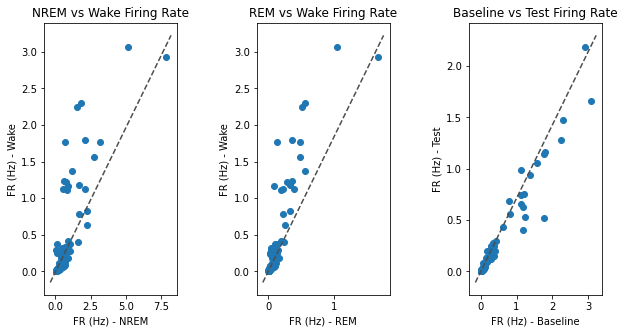

In [23]:
nrem_avgFR = st[nrem_epochs & behavioral_epochs[3]].n_spikes/(nrem_epochs.duration + behavioral_epochs[3].duration)
wake_avgFR_baseline = st[wake_epochs & behavioral_epochs[2]].n_spikes/(wake_epochs.duration + behavioral_epochs[2].duration)
rem_avgFR = st[rem_epochs & behavioral_epochs[3]].n_spikes/(rem_epochs.duration + behavioral_epochs[3].duration)
wake_avgFR_test = st[wake_epochs & behavioral_epochs[4]].n_spikes/(wake_epochs.duration + behavioral_epochs[4].duration)

fig, axs = plt.subplots(1,3, figsize = (10,5))
fig.subplots_adjust(hspace = .5, wspace=.60)
axs = axs.ravel()

axs[0].scatter(nrem_avgFR,wake_avgFR_baseline)
axs[1].scatter(rem_avgFR,wake_avgFR_baseline)
axs[2].scatter(wake_avgFR_baseline,wake_avgFR_test)

axs[0].set_title('NREM vs Wake Firing Rate')
axs[1].set_title('REM vs Wake Firing Rate')
axs[2].set_title('Baseline vs Test Firing Rate')

axs[0].set_xlabel('FR (Hz) - NREM')
axs[1].set_xlabel('FR (Hz) - REM')
axs[2].set_xlabel('FR (Hz) - Baseline')

axs[0].set_ylabel('FR (Hz) - Wake')
axs[1].set_ylabel('FR (Hz) - Wake')
axs[2].set_ylabel('FR (Hz) - Test')

axs[0].plot(axs[0].get_xlim(), axs[0].get_ylim(), ls="--", c=".3")
axs[1].plot(axs[1].get_xlim(), axs[1].get_ylim(), ls="--", c=".3")
axs[2].plot(axs[2].get_xlim(), axs[2].get_ylim(), ls="--", c=".3")
fig.show()


In [16]:
wake_avgFR

0.0

In [10]:
x = ripple_epochs.starts
bins = np.arange(x.min(),x.max(),300)
ts = (bins[:-1]+300/2)
binned,_ = np.histogram(x,bins=bins)

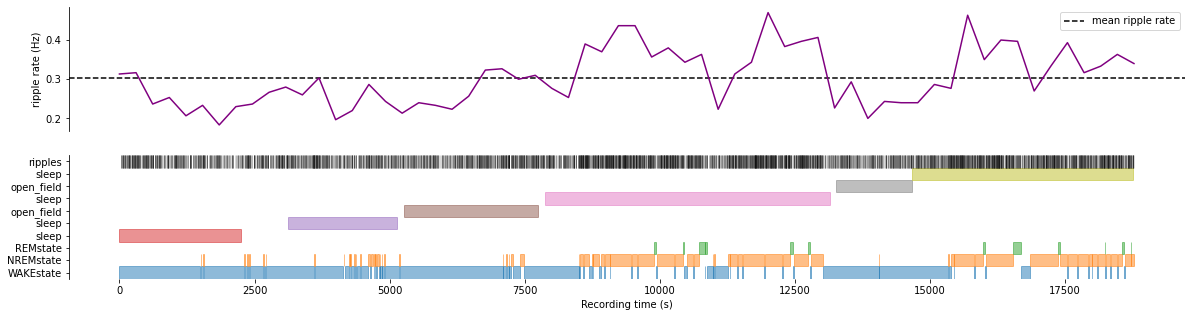

In [11]:
fig, ax = plt.subplots(2,1, figsize=(20,5))
ax[0].plot(ts,binned/300,color = "purple")
ax[0].axhline(np.mean(binned/300),linestyle = '--',color='k',zorder = -100,label = "mean ripple rate")
# ax[0].axvspan(behavioral_epochs[0].start,behavioral_epochs[0].stop,alpha=.2,zorder=-1000)
# ax[0].axvspan(behavioral_epochs[1].start,behavioral_epochs[1].stop,alpha=.2,zorder=-1000,color='r',label="object learning")
# ax[0].axvspan(behavioral_epochs[2].start,behavioral_epochs[2].stop,alpha=.2,zorder=-1000,color='purple',label="sleep")
ax[0].legend()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].get_xaxis().set_ticks([])

ax[0].set_ylabel('ripple rate (Hz)')
# ax[0].xlabel('time (sec)')
plot_sig_replay_over_epochs(basepath,ax[1])


In [12]:
x = ripple_epochs.starts
bins = np.arange(x.min(),x.max(),300)
ts = (bins[:-1]+300/2)
binned,_ = np.histogram(x,bins=bins)

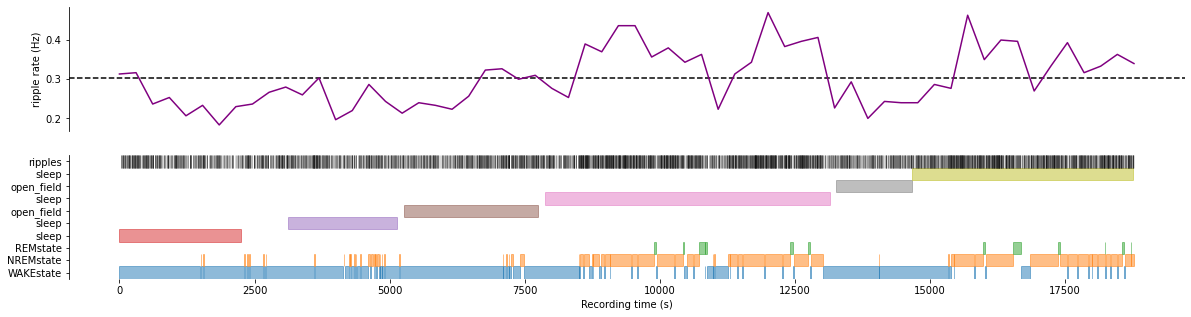

In [13]:
fig, ax = plt.subplots(2,1,figsize=(20,5))

ax[0].plot(ts,binned/300,color = 'purple')
ax[0].axhline(np.mean(binned/300),linestyle = '--',color='k',zorder = -100,label = "mean ripple rate")
# ax[0].axvspan(behavioral_epochs[1].start,behavioral_epochs[1].stop,alpha=.2,zorder=-1000)
# ax[0].axvspan(behavioral_epochs[3].start,behavioral_epochs[3].stop,alpha=.2,zorder=-1000,color='r',label="object learning")
# ax[0].axvspan(behavioral_epochs[5].start,behavioral_epochs[5].stop,alpha=.2,zorder=-1000,color='purple',label="object test")
# ax[0].axvspan(behavioral_epochs[4].start,behavioral_epochs[4].stop,alpha=.2,zorder=-1000)
# ax[0].axvspan(behavioral_epochs[6].start,behavioral_epochs[6].stop,alpha=.2,zorder=-1000,label="sleep")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_ylabel('ripple rate (Hz)')
ax[0].get_xaxis().set_ticks([])


plot_sig_replay_over_epochs(basepath,ax[1])


In [14]:
## PTSH ripple across epochs
import functions
C = functions.crossCorr(ripple_epochs.starts,ripple_epochs.starts,0.1,100)


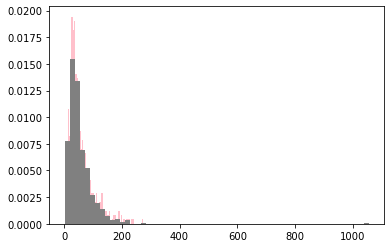

In [15]:
idx_1 = ripples.peaks.between(behavioral_epochs[0].start,behavioral_epochs[0].stop)
# idx_2 = ripples.peaks.between(behavioral_epochs[1].start,behavioral_epochs[1].stop)
idx_3 = ripples.peaks.between(behavioral_epochs[2].start,behavioral_epochs[2].stop)

import seaborn as sns

plt.hist(ripples[idx_1].amplitude,60,density = True,color='pink')
# plt.hist(ripples[idx_2].amplitude,60,density = True,color='grey')
plt.hist(ripples[idx_3].amplitude,60,density = True,color='grey')

plt.show()

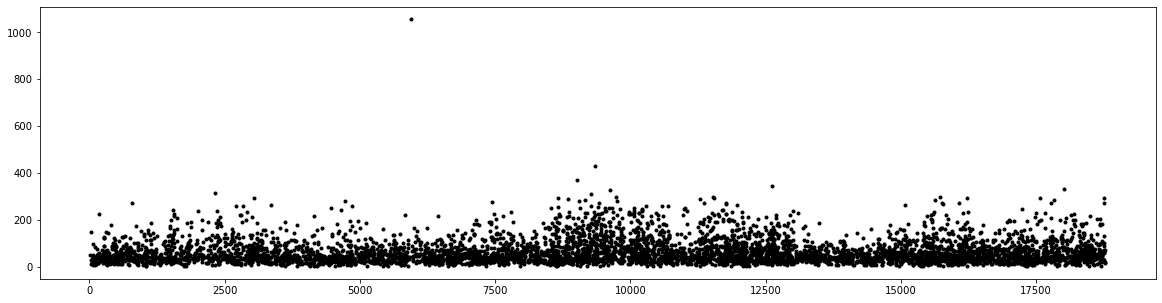

In [16]:
plt.figure(figsize=(20,5))
plt.plot(ripples.start,ripples.amplitude,'.k')

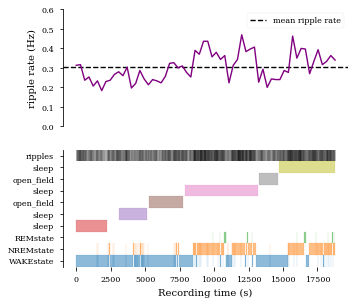

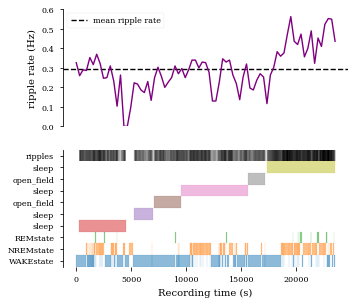

In [147]:
import os
sessions = ['D:/app_ps1/data/hpc04/hpc04_day06_220217_085558',
'D:/app_ps1/data/hpc04/hpc04_day09_220221_094101',]
save_path = r'D:\app_ps1\figures'
days = ['Iso-Ctrl','Ly6G']

functions.set_plotting_defaults()
for i,basepath in enumerate(sessions): 
    
    ripples = loading.load_ripples_events(basepath)

    # behavioral epochs
    epoch_df = loading.load_epoch(basepath)
    behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])
    # get brain states                                                
    state_dict = loading.load_SleepState_states(basepath)
    nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
    wake_epochs = nel.EpochArray(state_dict['WAKEstate'])

    ripple_epochs = nel.EpochArray([np.array([ripples.start, ripples.stop]).T])
    
    x = ripple_epochs.starts
    bins = np.arange(x.min(),x.max(),300)
    ts = (bins[:-1]+300/2)
    binned,_ = np.histogram(x,bins=bins)

    fig, ax = plt.subplots(2,1,figsize=functions.set_size('beamer',fraction = 1.2, subplots = (1.5,1)))

    ax[0].plot(ts,binned/300,color = 'purple')
    ax[0].axhline(np.mean(binned/300),linestyle = '--',color='k',zorder = -100,label = "mean ripple rate")
    # ax[0].axvspan(behavioral_epochs[1].start,behavioral_epochs[1].stop,alpha=.2,zorder=-1000)
    # ax[0].axvspan(behavioral_epochs[3].start,behavioral_epochs[3].stop,alpha=.2,zorder=-1000,color='r',label="object learning")
    # ax[0].axvspan(behavioral_epochs[5].start,behavioral_epochs[5].stop,alpha=.2,zorder=-1000,color='purple',label="object test")
    # ax[0].axvspan(behavioral_epochs[4].start,behavioral_epochs[4].stop,alpha=.2,zorder=-1000)
    # ax[0].axvspan(behavioral_epochs[6].start,behavioral_epochs[6].stop,alpha=.2,zorder=-1000,label="sleep")
    ax[0].legend()
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].set_ylabel('ripple rate (Hz)')
    ax[0].set_ylim([0,.6])
    ax[0].get_xaxis().set_ticks([])


    plot_sig_replay_over_epochs(basepath,ax[1])


    plt.savefig(os.path.join(save_path,days[i]+'.svg'),dpi=300,bbox_inches='tight')


In [136]:
os.path.join(save_path+days[i]+'.svg')

'D:/app_ps1/data/hpc04/hpc04_day09_220221_094101Ly6G.svg'

In [115]:
print(behavioral_epochs[0])


<EpochArray at 0x20fa92ec9a0: 1 epoch> of length 6:30:51:956 hours
